Train and fine-tune a Decision Tree for the moons dataset.

In [52]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt

data = make_moons(n_samples=10000, noise=0.4, random_state=55)
x, y = data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

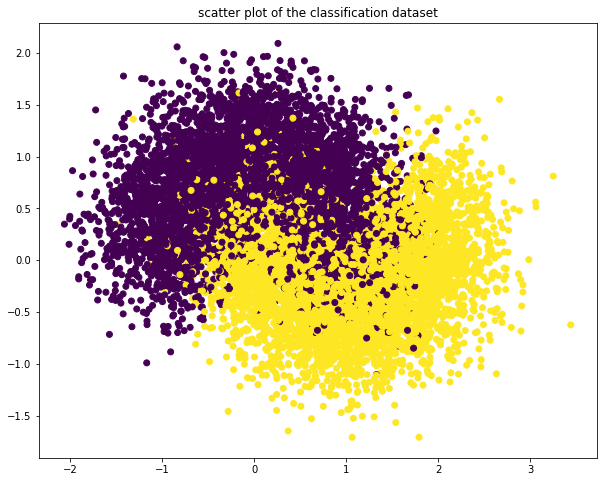

In [53]:
plt.figure(figsize=(10,8))
plt.title("scatter plot of the classification dataset")
plt.scatter(x[:,0], x[:,1], c=y)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

clf = DecisionTreeClassifier(random_state=55)
parameters = {'min_samples_split':[2, 4, 6], 'min_samples_leaf':[1,3,5], 'max_leaf_nodes':list(range(2,50))}
                                                                                             
cv = GridSearchCV(clf, parameters, verbose=1, cv=5)
cv.fit(x_train, y_train)

final_model = cv.best_estimator_
print("the classification accuracy is: ",final_model.score(x_test, y_test)*100,"%")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the classification accuracy is:  85.95 %


[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   17.7s finished


[-2.5, 2.5, -2.5, 2.5]

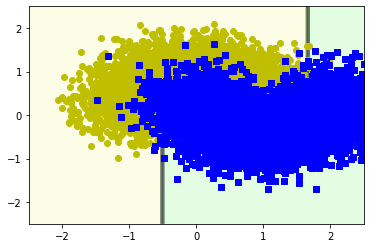

In [55]:
#visualization of the decision boundary

from matplotlib.colors import ListedColormap

axes=[-2.5, 2.5, -2.5, 2.5]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = final_model.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
plt.axis(axes)

Extend the previous decicion tree to a Random Forest Classifier

In [56]:
from sklearn.base import clone

def sample_data_list(x_train_data, y_train_data, n_instance=1000, n_cnt=100):
    assert x_train_data.shape[0] > n_cnt and x_train_data.shape[0] == y_train_data.shape[0]
    
    
    x_train_list = []
    y_train_list = []
    
    for i in range(n_instance):
        idx = np.random.randint(x_train_data.shape[0], size=n_cnt)
        x_train_list.append(x_train_data[idx, :])
        y_train_list.append(y_train_data[idx])
        
    return x_train_list, y_train_list


def get_forest(n_instance=1000):
    forest = [clone(final_model) for i in range(n_instance)]
    return forest



In [80]:
# Performance of the individual trees on the test data

n_trees = 1000
forest = get_forest(n_trees)
x_t, y_t = sample_data_list(x_train, y_train, n_instance=1000, n_cnt=1000) 

acc = []
for xs, ys, tree in zip(x_t, y_t, forest):
    tree.fit(xs, ys)
    acc_n = tree.score(x_test, y_test)
    acc.append(acc_n)

print("the mean accuracy score is: ",np.mean(acc)*100)
   


the mean accuracy score is:  84.0866


Aggregate the prediction of all the trees in the forest. Use the mode of the predictions which is also similar to the majority vote of all the trees.

In [79]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
forest_pred = np.empty([n_trees, len(x_test)] , dtype=np.uint32)

for i in range(len(forest)):
    forest_pred[i] = forest[i].predict(x_test)
    
y_pred_majority_votes, n_votes = mode(forest_pred, axis=0)

print("the new accuracy score by majority voting is:", accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))*100)


the new accuracy score by majority voting is: 86.1
